<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product" />
</a> 

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Practice: Softmax Classifer Using Sequential</h1> 

<h2>Table of Contents</h2>
<p>In this lab, you will use a single layer Softmax to classify handwritten digits from the MNIST database.</p>

<ul>
    <li><a href="#Makeup_Data">Make up Data</a></li>
    <li><a href="#Model">Criterion function, Optimizer, and Train the Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>1- Preparation</h2>

We'll need the following libraries

In [2]:
! wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/meet_up/12.02.2020/model.pt

--2020-02-13 20:25:42--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/meet_up/12.02.2020/model.pt
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6674530 (6.4M) [application/octet-stream]
Saving to: ‘model.pt.2’

model.pt.2          100%[===================>]   6.37M  7.08MB/s    in 0.9s    

2020-02-13 20:25:43 (7.08 MB/s) - ‘model.pt.2’ saved [6674530/6674530]



In [3]:
! wget https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/meet_up/12.02.2020/modelnotrans.pt

--2020-02-13 20:25:43--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/meet_up/12.02.2020/modelnotrans.pt
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6674530 (6.4M) [application/octet-stream]
Saving to: ‘modelnotrans.pt.2’

modelnotrans.pt.2   100%[===================>]   6.37M  3.05MB/s    in 2.1s    

2020-02-13 20:25:46 (3.05 MB/s) - ‘modelnotrans.pt.2’ saved [6674530/6674530]



In [4]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

Use the following function to visualize data: 

In [5]:
# Display data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

In [6]:
trans = transforms.Compose([transforms.RandomAffine(100),transforms.ToTensor()])
#trans=transforms.ToTensor()

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">2- Load Data</h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [7]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=trans )
print("Print the training dataset:\n ", train_dataset)


train_dataset_1 = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor() )
print("Print the training dataset:\n ", train_dataset_1)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): Compose(
                             RandomAffine(degrees=(-100, 100))
                             ToTensor()
                         )
    Target Transforms (if any): None
Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [8]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=trans)
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): Compose(
                             RandomAffine(degrees=(-100, 100))
                             ToTensor()
                         )
    Target Transforms (if any): None


Note that the data type is long: 

In [9]:
# Print the type of the element

print("Type of data element: ", train_dataset[0][1].type())

Type of data element:  torch.LongTensor


Each element in the rectangular tensor corresponds to a number that represents a pixel intensity as demonstrated by the following image:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements" />

Print out the fourth label: 

In [10]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  tensor(1)


The image:  None


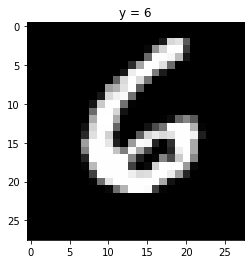

In [11]:
print("The image: ", show_data(train_dataset_1[90]))

Plot the the fourth sample: 

The image:  None


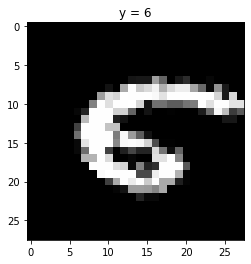

In [12]:
# Plot the image

print("The image: ", show_data(train_dataset[90]))

You see its a 1. Now, plot the third sample:

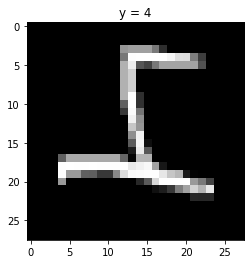

In [13]:
# Plot the image

show_data(train_dataset[2])

The Softmax function requires vector inputs. If you see the vector shape, you'll note it's 28x28.

In [14]:
# Print the shape of the first element in train_dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

Flatten the tensor as shown in this image:

The size of the tensor is now 784.

<h3>3- Building Two Layers of NN model </h3>

Set the input size and output size for each layer with Softmax. 

<!--Empty Space for separating topics-->

<h2 id="Model">Define the Softmax Classifier, Criterion function, Optimizer, and Train the Model</h2> 

View the size of the model parameters:

Cover the model parameters for each class to a rectangular grid:  

Define the dataset loader:

In [15]:
# Define the learning rate, optimizer, criterion and data loader

learning_rate = 0.005
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
train_loader_1 = torch.utils.data.DataLoader(dataset=train_dataset_1, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)

NameError: name 'optim' is not defined

<h3>4- Training the model </h3>

<h3>4.1- Training the model with Transformed dataset </h3>

In [16]:
checkpoint_1= torch.load('model.pt')
loss_list=[s.item() for s in checkpoint_1['loss_list']]


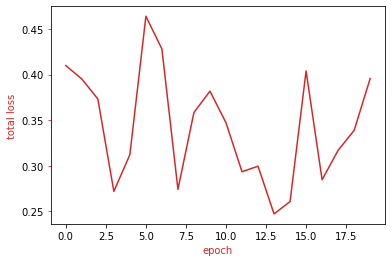

In [17]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color = color)
ax1.set_xlabel('epoch', color = color)
ax1.set_ylabel('total loss', color = color)
ax1.tick_params(axis = 'y', color = color)
    
#ax2 = ax1.twinx()  
#color = 'tab:blue'
#ax2.set_ylabel('accuracy', color = color)  
#ax2.plot( accuracy_list, color = color)
#ax2.tick_params(axis = 'y', color = color)
#fig.tight_layout()

<h3>4.2- Training the model without Transformed dataset </h3>

Analyze Results

Plot the loss and accuracy on the validation data:

In [18]:
checkpoint_2= torch.load('modelnotrans.pt')
loss_list=[s.item() for s in checkpoint_2['loss_list']]

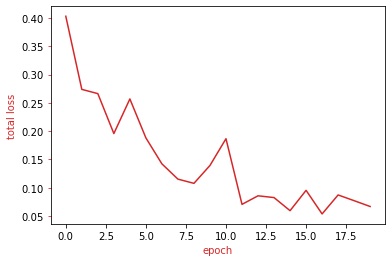

In [19]:

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color = color)
ax1.set_xlabel('epoch', color = color)
ax1.set_ylabel('total loss', color = color)
ax1.tick_params(axis = 'y', color = color)
    
#ax2 = ax1.twinx()  
#color = 'tab:blue'
#ax2.set_ylabel('accuracy', color = color)  
#ax2.plot( accuracy_list, color = color)
#ax2.tick_params(axis = 'y', color = color)
#fig.tight_layout()

<h3>5- Reloading models </h3>

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is pursuing a Master's of management in Artificial intelligence. Nayef is working in IBM as Cognitive Data Scientist 

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.